# Decision Trees

The process of constructing a decision tree is loosely based on the concepts of **information entropy and information gain** from information theory. A decision tree is a graph that describes a model of decisions and their possible consequences. An internal node in a decision tree represents a decision, or rather a condition of a particular feature in the context of classification. It has two possible outcomes that are represented by the left and right subtrees of the node. Of course, a node in the decision tree coul also have more than two subtrees. Each leaf node represents a particular class.

There are actually several algorithms that are used to construct a decision tree from some training data. Generally, the tree is constructed by splitting the set of sample values in the training data into smaller subsets based on an attribute value test. The process is repeated in each subset until splitting a given subset of sample values no longer adds internal nodes to the decision tree.

Once a decision tree has been created, we can optionally perform **pruning** on the tree. Pruning is simply the process of removing any extraneous decision nodes from the tree. This can be thought as a form for the regularization of decision tree through which we prevent underfitting or overfitting of the estimated decision tree model.

**J48** is an open source implementation of the **C4.5** algorithm in Java.

**Pros** Computationally cheap to use, easy for humans to understand learned results (interpretability), missing values OK, can deal with irrelevant features.

**Cons**: Prone to overfitting

**Works with**: Numeric values and  nominal values.

## Maximizing Information Gain
We need to define an **objective function** that we want to optimize via the tree learning algorithm. In this case, the function is to maximize the **information gain** at each split. For simplicity and to reduce the combinatorial search space, most libraries (including scikit-learn) implement binary decision trees.

The three impurity criteria that are commonly used in binary decision trees are **Gini index**, **entropy**, and the **classification error**.

In practice both the Gini index and entropy typycally yoield very similar results and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

In [2]:
# Function to calculate the Shannon Entropy of a dataset
from math import log
import operator

def calcShannonEnt(dataset):
    numEntries = len(dataset)
    labelCounts = {}
    for featVec in dataset:
        currentLabel = featVec[-1] 
        #print currentLabel
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 1
        else:
            labelCounts[currentLabel] += 1
            
    #print labelCounts
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        #print prob
        shannonEnt -= prob * log(prob,2)
        
    return shannonEnt

def splitDataSet(dataset, axis, value):
    retDataSet = []
    for featVec in dataset:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def createTree(dataset, labels):
    classList = [example[-1] for example in dataset]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataset[0]) == 1:
        return majorityCnt(classList)
    bestFeature = chooseBestFeatureToSplit(dataset)
    bestFeatureLabel = labels[bestFeature]
    myTree = {bestFeatureLabel: {}}
    del(labels[bestFeature])
    featValues = [example[bestFeature] for example in dataset]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatureLabel][value] = createTree(splitDataSet\
                                                    (dataset, bestFeature, value), subLabels)
    return myTree

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 1
        else:
            classList[vote] +=1
    

def chooseBestFeatureToSplit(dataset):
    numFeatures = len(dataset[0]) - 1
    baseEntropy = calcShannonEnt(dataset)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataset]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataset, i, value)
            prob = len(subDataSet)/float(len(dataset))
            newEntropy += prob * calcShannonEnt(subDataSet)

        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i

    return bestFeature

def createDataSet():
    dataset = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no'],]

    labels = ['no surfacing', 'flippers']

    return dataset, labels

In [3]:
myDat, labels = createDataSet()

In [4]:
calcShannonEnt(myDat)

0.9709505944546686

In [5]:
myDat[0][-1] = 'maybe'
calcShannonEnt(myDat)

1.3709505944546687

In [6]:
splitDataSet(myDat, 0, 1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [7]:
chooseBestFeatureToSplit(myDat)

0

In [8]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## Training a Decision Tree via scikit-learn

In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # we use two features for visualization purposes
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Normal Standard deviation of u and sigma parameters
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
# eta0 = learning rate
# n_iter = number of epochs (passes over the training set)
# Random state is used for reproducibility of the initial shuffiling
# of the training dataset
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=0)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, tree.predict(X_test_std)))

Accuracy: 0.98


In [13]:
from plotting import *

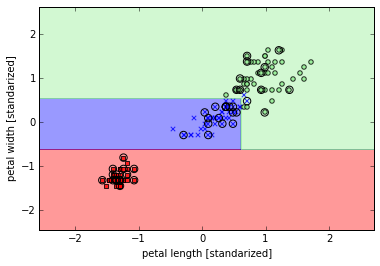

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=tree,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')

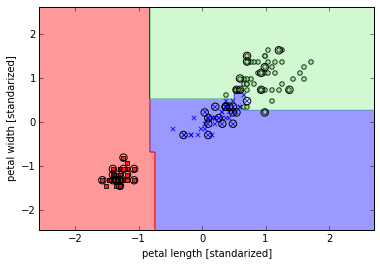

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1,
                                 n_jobs=2)
forest.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=forest,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')